Nama : Ikmal Saepul R <br>
NIM : 211351063<br>
Kelas : IF Malam B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikmalsaepulr","key":"06009c3212c3def91c23e6818fa4cb95"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d uciml/glass

  0% 0.00/3.42k [00:00<?, ?B/s]
100% 3.42k/3.42k [00:00<00:00, 8.31MB/s]


In [4]:
!mkdir glass
!unzip glass.zip -d glass
!ls glass

Archive:  glass.zip
  inflating: glass/glass.csv         
glass.csv


# import library yang digunakan

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

In [7]:
import pickle

# Data Discovery

In [8]:
df = pd.read_csv('/content/glass/glass.csv')

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [13]:
df.shape

(214, 10)

In [14]:
df.duplicated().head(40)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39     True
dtype: bool

In [15]:
df.drop(index = 39, axis = 0, inplace = True)

In [16]:
df.duplicated().sum()

0

# EDA (minimal 5)

<Axes: xlabel='Type', ylabel='count'>

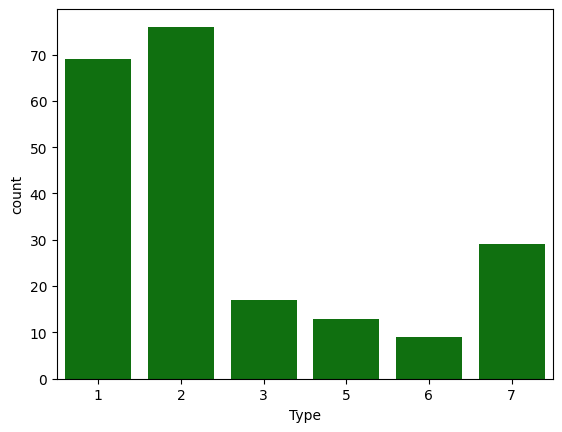

In [18]:
sns.countplot(x = df['Type'], color = 'green')

In [21]:
numerical = [
    'RI',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Ba',
    'Fe'
]

categorical = [
    'Type'
]

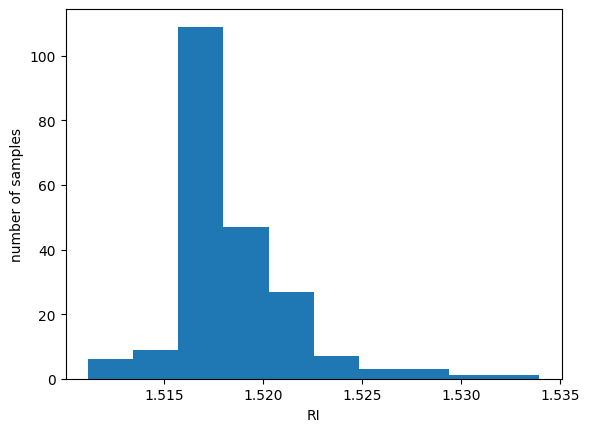

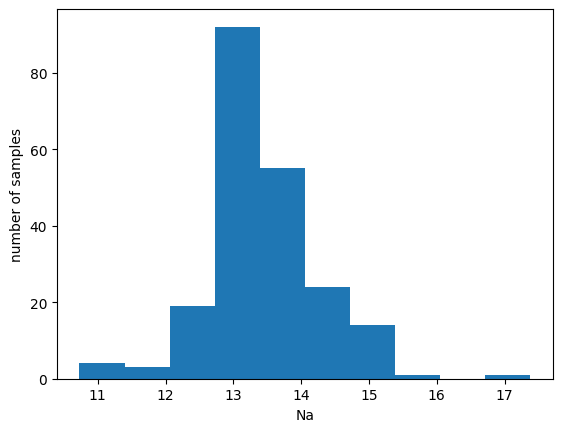

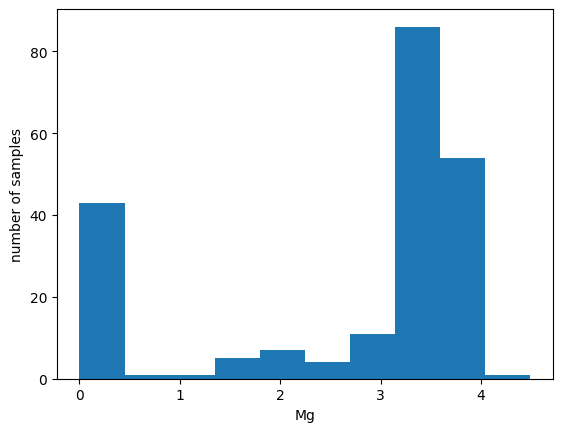

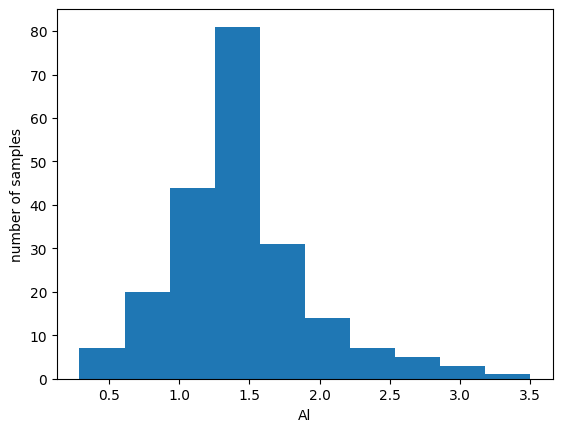

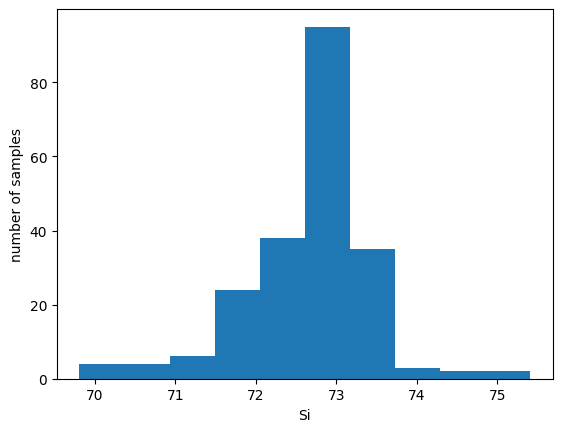

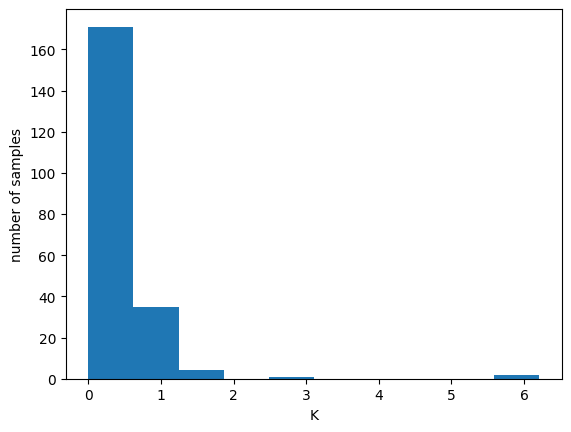

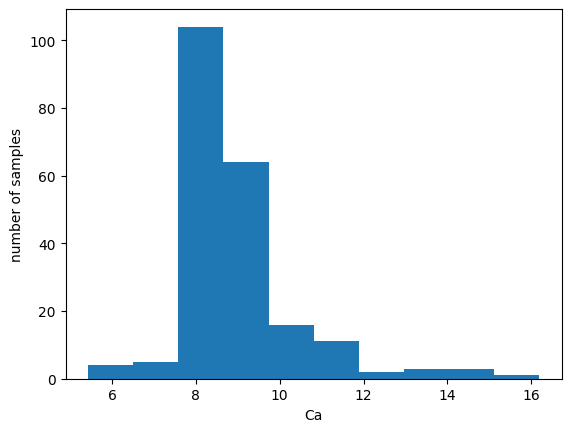

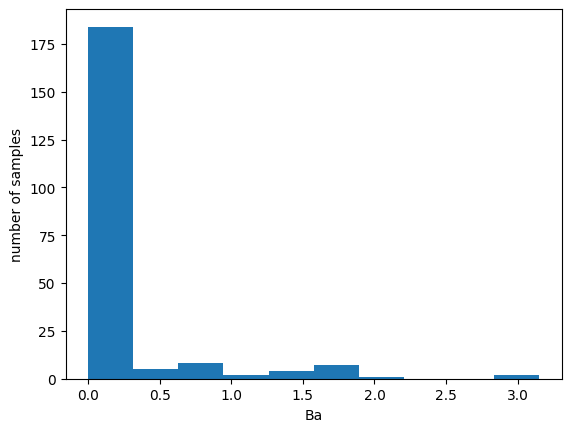

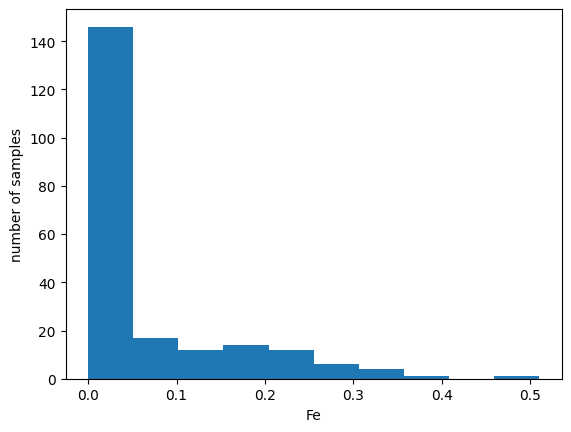

In [22]:
for i in df[numerical].columns:
    plt.hist(df[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()

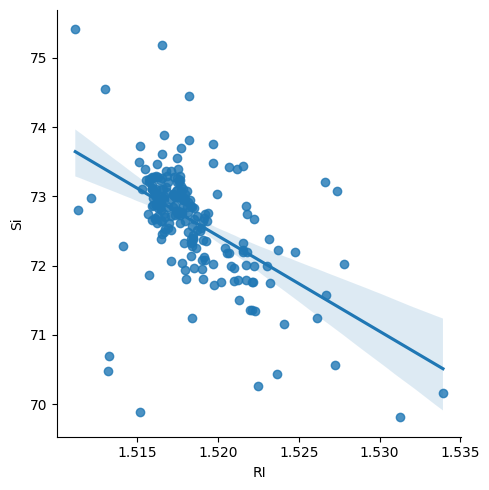

In [25]:
sns.lmplot(x='RI', y='Si', data=df)
plt.show()

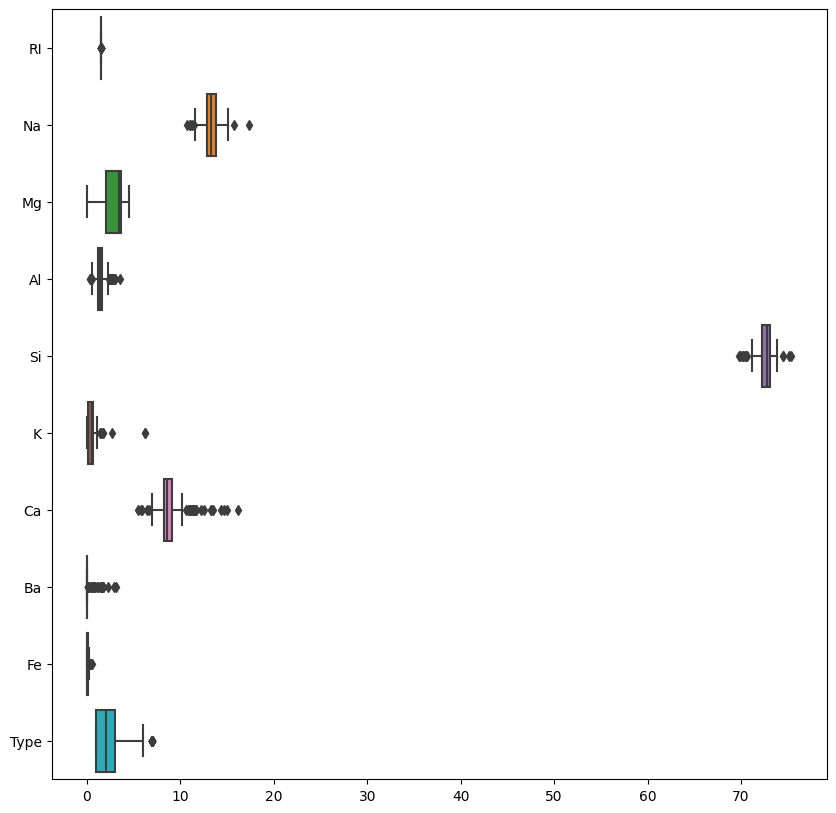

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, orient="h");

# Preprocessing

In [27]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
X = df.drop('Type', axis = 1)
y = df['Type']

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# modeling

In [31]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0,
    random_state=42, splitter='best'
)

model = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Data Train Accuracy = {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Data Test Accuracy = {dtc_acc} \n")

Data Train Accuracy = 0.8187919463087249
Data Test Accuracy = 0.703125 



In [32]:
confusion_mat = confusion_matrix(y_test, y_pred)

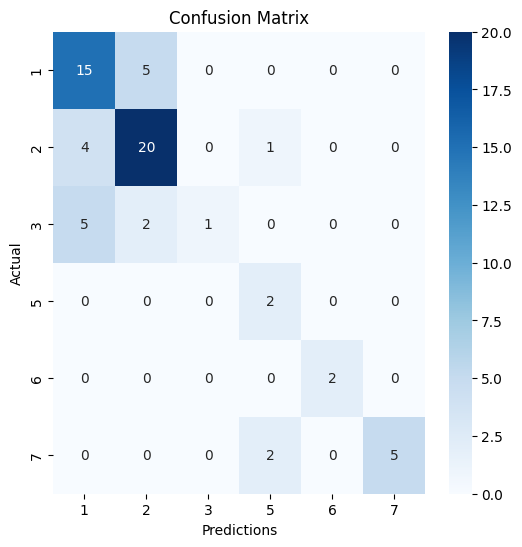

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.75      0.68        20
           2       0.74      0.80      0.77        25
           3       1.00      0.12      0.22         8
           5       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         2
           7       1.00      0.71      0.83         7

    accuracy                           0.70        64
   macro avg       0.79      0.73      0.68        64
weighted avg       0.76      0.70      0.68        64



In [37]:
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

print("Classification Report:\n", class_report)

In [38]:
input_data = (1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
    print('Kaca Bangunan (Bukan Float Proses)')
elif (prediction[0] == 2):
        print('Kaca Bangunan (Float Proses)')
elif (prediction[0] == 2):
        print('Kaca Mobil (Non Float Proses)')
elif (prediction[0] == 2):
        print('Kaca Mobil (Float Proses)')
elif (prediction[0] == 2):
        print('Wadah Kaca')
elif (prediction[0] == 2):
        print('Peralatan Dapur')
else :
    print('Kaca Lampu')

[[ 0.82337811  0.32241914  1.26680335 -0.71500479 -1.10889536 -0.59942436
  -0.1832657  -0.37897356 -0.5993232 ]]
[1]
Kaca Bangunan (Bukan Float Proses)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

In [41]:
class_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

[Text(0.5, 0.875, 'x[2] <= 0.054\nentropy = 2.194\nsamples = 149\nvalue = [49, 51, 9, 11, 7, 22]'),
 Text(0.25, 0.625, 'x[1] <= 0.455\nentropy = 1.894\nsamples = 46\nvalue = [0, 9, 0, 11, 7, 19]'),
 Text(0.125, 0.375, 'x[0] <= 1.901\nentropy = 1.233\nsamples = 18\nvalue = [0, 7, 0, 10, 0, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.817\nsamples = 12\nvalue = [0, 1, 0, 10, 0, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0, 0]'),
 Text(0.375, 0.375, 'x[7] <= -0.024\nentropy = 1.353\nsamples = 28\nvalue = [0, 2, 0, 1, 7, 18]'),
 Text(0.3125, 0.125, 'entropy = 1.157\nsamples = 10\nvalue = [0, 2, 0, 0, 7, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.31\nsamples = 18\nvalue = [0, 0, 0, 1, 0, 17]'),
 Text(0.75, 0.625, 'x[6] <= -0.469\nentropy = 1.493\nsamples = 103\nvalue = [49, 42, 9, 0, 0, 3]'),
 Text(0.625, 0.375, 'x[2] <= 0.46\nentropy = 1.019\nsamples = 35\nvalue = [7, 26, 0, 0, 0, 2]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2]')

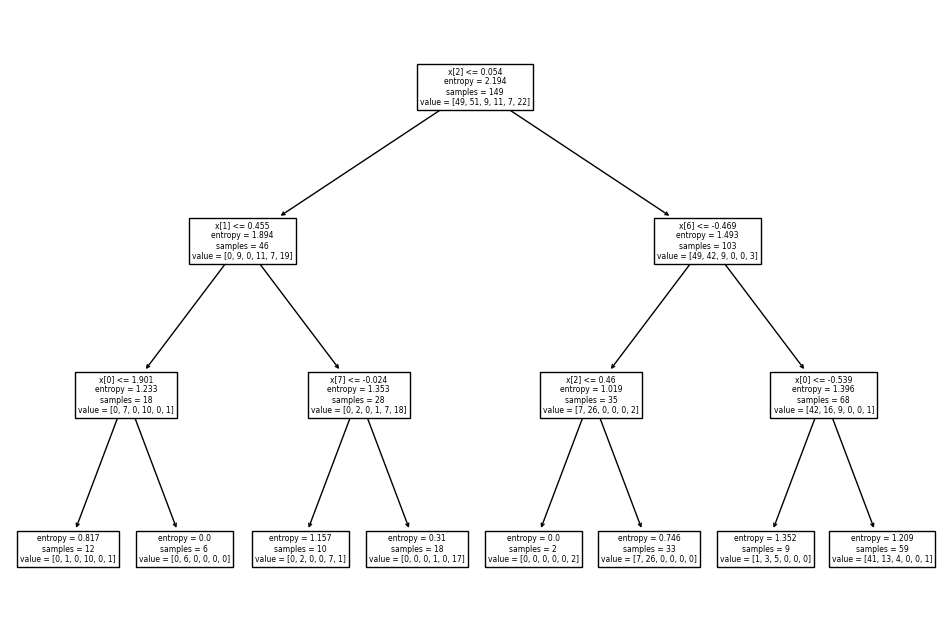

In [42]:
plt.figure(figsize=(12,8))
tree.plot_tree(class_tree.fit(X_train, y_train))

# save model (pickle)

In [43]:
filename = 'glass_classification_d3.sav'
pickle.dump(model, open(filename,'wb'))